## Install tranfformer library

In [2]:
!pip install transformers

     |████████████████████████████████| 2.1MB 17.5MB/s 
     |████████████████████████████████| 3.3MB 50.4MB/s 
     |████████████████████████████████| 901kB 50.5MB/s 


In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [4]:
# !pip install tensorflow


In [5]:
 ! nvidia-smi

Thu May  6 19:52:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

BERT-base model that has 110 million parameters
## Import BERT Pre-trained Model and BERT Tokenizer

In [6]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [96]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased', return_dict=False)

#model = BertModel.from_pretrained("bert-base-cased",)
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [97]:
# sample data
text = ["The system shall refresh the display every 60 seconds.", 
        "The application shall match the color of the schema set forth by Department of Homeland Security."]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True)

# output
print(sent_id)

{'input_ids': [[101, 1996, 2291, 4618, 25416, 21898, 1996, 4653, 2296, 3438, 3823, 1012, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1996, 4646, 4618, 2674, 1996, 3609, 1997, 1996, 8040, 28433, 2275, 5743, 2011, 2533, 1997, 10759, 3036, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


* Input ids:  dictionary of two items(sentences). Integer sequences of the input sentences.
*  Special tokens: integers 101 and 102 
*  Padding token : 0
*  Attention_mask: list of 1’s and 0’s. 
* Informs the model to pay attention to the tokens corresponding to the mask value of 1 and ignore the rest.

# Import datasets for fine-tuning

In [98]:
script_dir = "/content/drive/MyDrive/Colab Notebooks"

In [99]:
import os
train_data_path =os.path.join(script_dir, "RequirementsData/requirements_tags.xlsx")
train_data_path

'/content/drive/MyDrive/Colab Notebooks/RequirementsData/requirements_tags.xlsx'

In [100]:
df_train = pd.read_excel(train_data_path)

In [101]:
df_train.head()

,Requirements,Tag,Req_type
0,The system shall refresh the display every 60 ...,PE:,0
1,The application shall match the color of the s...,LF:,0
2,If projected the data must be readable. On ...,US:,0
3,The product shall be available during normal ...,A:,0
4,If projected the data must be understandable...,US:,0


In [102]:
# split train dataset into train, validation and test sets
train_reqs, val_reqs, train_class, val_class = train_test_split(df_train['Requirements'], df_train['Req_type'], 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                stratify=df_train['Req_type'])



In [103]:
print(train_reqs.shape)
train_reqs.head()

(444,)


143    The product must be designed using Design Patt...
410    The product shall be updated on a regular basi...
449    The Disputes application shall interface with ...
51     The product shall be easy to learn by Adjuster...
531    The system shall display data from the Sync Ma...
Name: Requirements, dtype: object

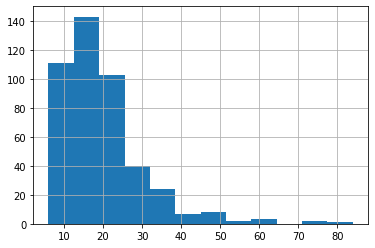

In [104]:

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_reqs]

pd.Series(seq_len).hist(bins = 12)

In [105]:
# Most of the requirments word lenght are between 12 to 18
# TODO use this to decide the max length

No need to give labels while fine tuning using pretrained  moldel to specific task based data

In [106]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_reqs.tolist(),
    truncation=True,
    max_length = 25,
    padding =True

)

In [107]:
print(tokens_train['input_ids'][0])

[101, 1996, 4031, 2442, 2022, 2881, 2478, 2640, 7060, 1998, 16861, 2190, 6078, 1012, 3938, 1003, 1997, 6032, 4007, 9797, 2024, 2583, 2000, 17409, 102]


In [108]:
# tokenize and encode sequences in the test set

In [110]:
 #return_dict=False return_dict=False return_dict=False return_dict=False# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_reqs.tolist(),
    truncation=True,
    max_length = 25,
    padding =True
    
)

# tokenize and encode sequences in the test set


In [111]:
# Convert Integer Sequences to Tensors

In [112]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_class.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_class.tolist())




In [113]:

# creatr dataloader

In [114]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [115]:
# Train the model

In [116]:
# Function fine tuning the bert

# Freez bert parameters

In [117]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [118]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [119]:

# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [120]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5) 

In [121]:

from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight('balanced', np.unique(train_class), train_class)

print(class_wts)
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10


[0.80434783 1.32142857]


In [125]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [126]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch
    with torch.no_grad():
          
          # model predictions
          preds = model(sent_id, mask)

          # compute the validation loss between actual and predicted values
          loss = cross_entropy(preds,labels)

          total_loss = total_loss + loss.item()

          preds = preds.detach().cpu().numpy()

          total_preds.append(preds)

      # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

      # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [127]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 0.681
Validation Loss: 0.677

 Epoch 2 / 10

Evaluating...

Training Loss: 0.678
Validation Loss: 0.678

 Epoch 3 / 10

Evaluating...

Training Loss: 0.682
Validation Loss: 0.678

 Epoch 4 / 10

Evaluating...

Training Loss: 0.676
Validation Loss: 0.677

 Epoch 5 / 10

Evaluating...

Training Loss: 0.674
Validation Loss: 0.678

 Epoch 6 / 10

Evaluating...

Training Loss: 0.683
Validation Loss: 0.674

 Epoch 7 / 10

Evaluating...

Training Loss: 0.673
Validation Loss: 0.673

 Epoch 8 / 10

Evaluating...

Training Loss: 0.681
Validation Loss: 0.673

 Epoch 9 / 10

Evaluating...

Training Loss: 0.674
Validation Loss: 0.674

 Epoch 10 / 10

Evaluating...

Training Loss: 0.674
Validation Loss: 0.673


In [128]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [136]:
import os
test_data_path =os.path.join(script_dir, "RequirementsData/requirements_tags_test.xlsx")
test_data_path

'/content/drive/MyDrive/Colab Notebooks/RequirementsData/requirements_tags_test.xlsx'

In [137]:
test_df = pd.read_excel(test_data_path)

In [138]:
test_df.head()

,Requirements,Tag,Req_type_test
0,The system shall display Events or Activities.,F:,1
1,The display shall have two regions: left 2/3...,F:,1
2,The data displayed in both the nodes within th...,F:,1
3,The table side of the display shall be split i...,F:,1
4,The top 1/4 of the table will hold events that...,F:,1


In [142]:
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_df['Requirements'].tolist(),
    truncation=True,
    max_length = 25,
    padding =True

)

In [147]:
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_df['Req_type_test'].tolist())

In [148]:

# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [149]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.43      0.92      0.58        25
           1       0.88      0.31      0.46        45

    accuracy                           0.53        70
   macro avg       0.65      0.62      0.52        70
weighted avg       0.71      0.53      0.50        70



In [150]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,1
row_0,,
0,23,2
1,31,14


In [154]:
# for test set
test_labels = test_df['Req_type_test']
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [156]:
# split train dataset into train, validation and test sets
train_reqs, val_reqs, train_class, val_class = train_test_split(df_train['Requirements'], df_train['Req_type'], 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                stratify=df_train['Req_type'])
